In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline

In [4]:
df= pd.read_csv('/content/CE802_P2_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,False
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,False
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,True
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,True
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,False


In [5]:
df_test= pd.read_csv('/content/CE802_P2_Test.csv')
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,NaN,NaN
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,NaN,NaN
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27,NaN
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.73,NaN
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.31,NaN


# Create Function to Show result

In [6]:
def Final_result(y_test, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Final_Result Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred,average='macro')))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred,average='macro')))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred,average='macro')))

In [7]:
df.count()

F1       1500
F2       1500
F3       1500
F4       1500
F5       1500
F6       1500
F7       1500
F8       1500
F9       1500
F10      1500
F11      1500
F12      1500
F13      1500
F14      1500
F15       750
Class    1500
dtype: int64

In [8]:
df.isnull().sum().sum()
#df.drop(['F15'],axis=1,inplace=True)
# df['F15'] = df['F15'].fillna(0)

750

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   int64  
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


In [10]:
df.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
F1,1.000000,0.637508,0.630234,-0.620092,-0.637027,0.238974,-0.336565,0.600153,-0.611943,0.599113,0.614027,0.697186,0.738079,0.681754,-0.230740,-0.144057
F2,0.637508,1.000000,0.755101,-0.753287,-0.762769,-0.194739,-0.276405,0.706639,-0.750944,0.672167,0.763419,0.834246,0.888977,0.837365,-0.297380,-0.191255
F3,0.630234,0.755101,1.000000,-0.802995,-0.826213,-0.215099,-0.167082,0.679250,-0.804192,0.599455,0.813816,0.861852,0.873724,0.884842,-0.161148,-0.079108
F4,-0.620092,-0.753287,-0.802995,1.000000,0.818105,0.192413,0.170702,-0.676389,0.794590,-0.595590,-0.791322,-0.854378,-0.865109,-0.873428,0.187445,0.079035
F5,-0.637027,-0.762769,-0.826213,0.818105,1.000000,0.207080,0.181686,-0.675264,0.807678,-0.619599,-0.809473,-0.867305,-0.877293,-0.887500,0.176167,0.058308
F6,0.238974,-0.194739,-0.215099,0.192413,0.207080,1.000000,-0.251693,-0.069969,0.207789,-0.088436,-0.205886,-0.203882,-0.194345,-0.224060,0.071379,0.050738
F7,-0.336565,-0.276405,-0.167082,0.170702,0.181686,-0.251693,1.000000,-0.012291,0.166323,-0.204661,-0.176375,-0.201330,-0.229981,-0.182643,-0.019036,-0.024064
F8,0.600153,0.706639,0.679250,-0.676389,-0.675264,-0.069969,-0.012291,1.000000,-0.682649,0.540342,0.690864,0.733312,0.742369,0.755121,-0.239084,-0.152249
F9,-0.611943,-0.750944,-0.804192,0.794590,0.807678,0.207789,0.166323,-0.682649,1.000000,-0.611131,-0.804545,-0.855536,-0.863027,-0.873595,0.173578,0.068795
F10,0.599113,0.672167,0.599455,-0.595590,-0.619599,-0.088436,-0.204661,0.540342,-0.611131,1.000000,0.614240,0.721849,0.744822,0.727545,-0.363370,-0.266599


In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
F1,1500.0,NaN,NaN,NaN,22.976,14.31863,5.7,11.7,15.7,37.7,57.7
F2,1500.0,NaN,NaN,NaN,14.90628,12.97563,0.0,3.72,6.21,24.6,47.1
F3,1500.0,NaN,NaN,NaN,3.57348,5.108542,-13.22,-0.22,1.58,8.565,12.52
F4,1500.0,NaN,NaN,NaN,6.715067,4.982472,-2.3,1.96,8.62,10.385,22.18
F5,1500.0,NaN,NaN,NaN,13.34116,7.541549,-0.09,6.12,16.29,19.17,36.33
F6,1500.0,NaN,NaN,NaN,109.338,120.565344,-192.42,62.58,125.58,164.58,452.58
F7,1500.0,NaN,NaN,NaN,-0.127647,1.108964,-2.49,-0.78,-0.28,0.45,4.11
F8,1500.0,NaN,NaN,NaN,109.024667,117.33458,0.0,15.0,50.0,195.0,390.0
F9,1500.0,NaN,NaN,NaN,6.378787,2.540644,1.72,3.9,7.36,8.26,15.41
F10,1500.0,NaN,NaN,NaN,213.450667,142.833748,54.56,102.56,142.56,334.56,544.56


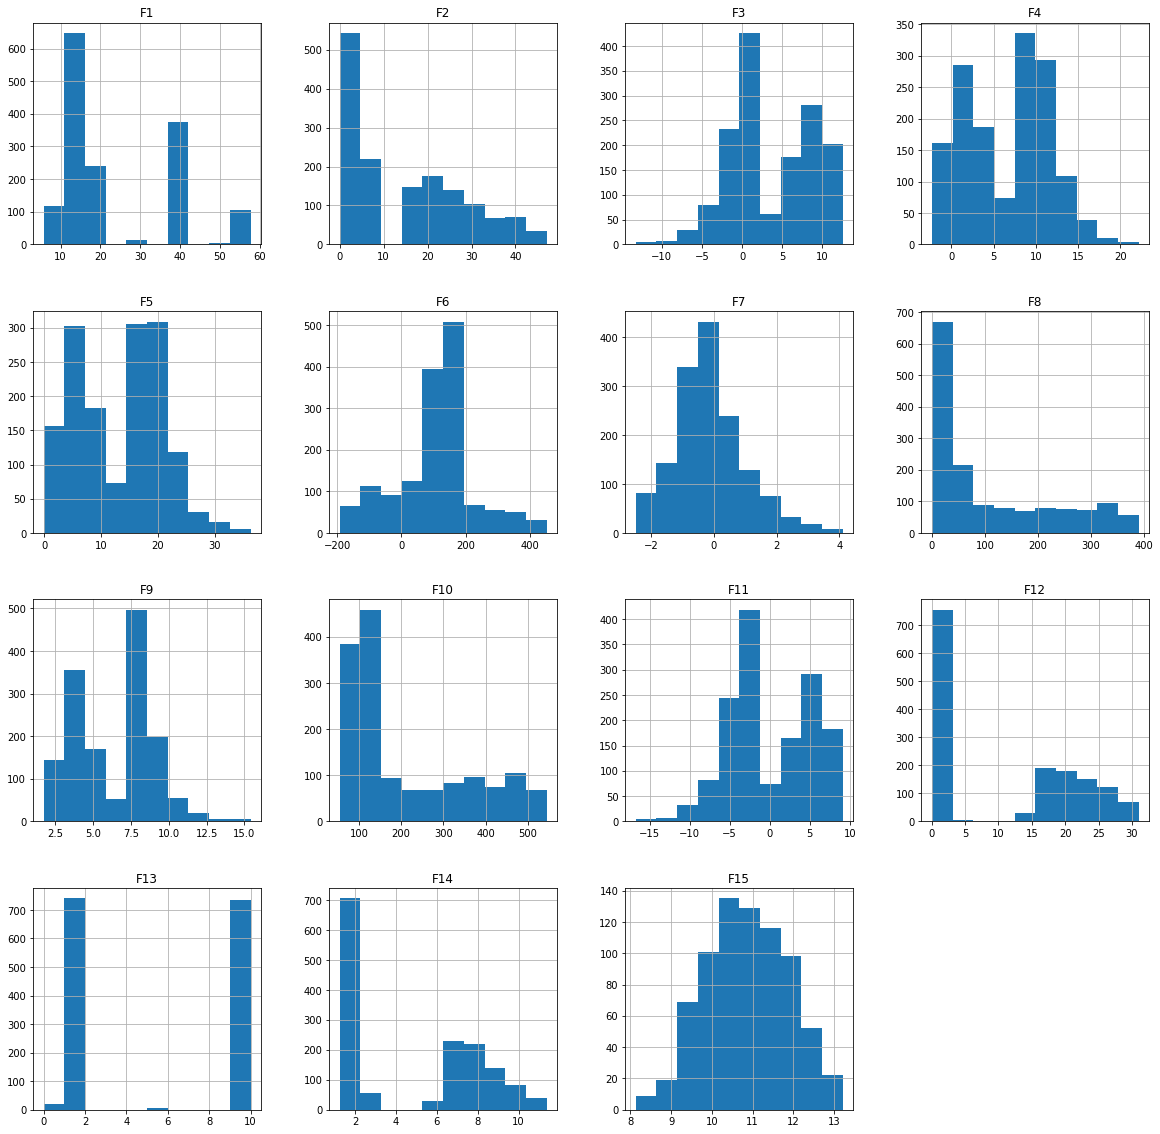

In [12]:
p = df.hist(figsize = (20,20))
plt.savefig("/content/Hist_map.png")

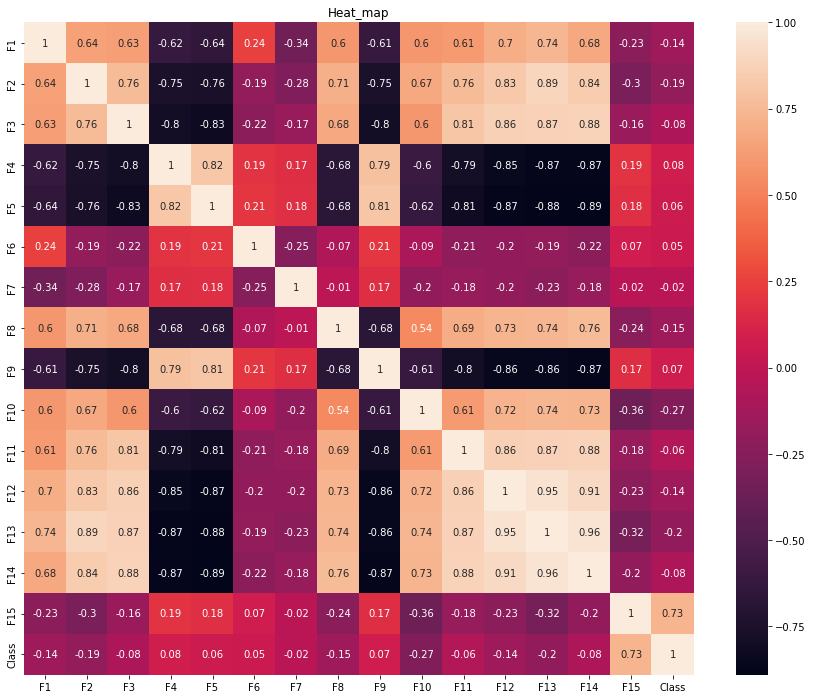

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.corr(),2),annot=True)
plt.title('Heat_map');
plt.show()
plt.savefig("/content/Heat_map.png")

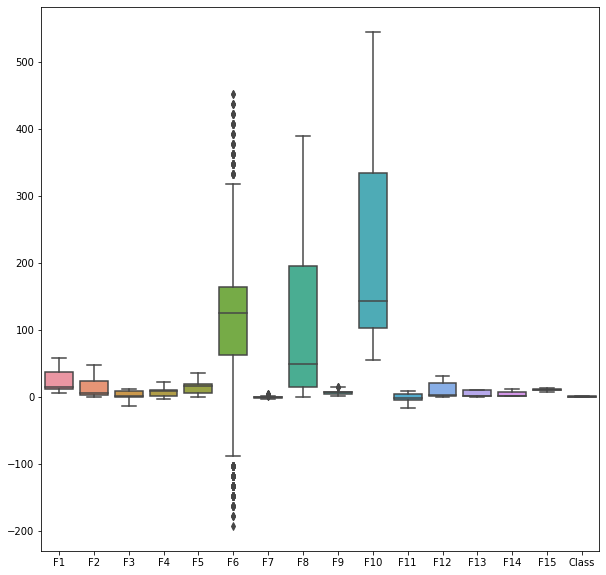

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()
plt.savefig("/content/out_map.png")

In [15]:
df.isnull().sum().sum()

750

In [16]:
df.count()

F1       1500
F2       1500
F3       1500
F4       1500
F5       1500
F6       1500
F7       1500
F8       1500
F9       1500
F10      1500
F11      1500
F12      1500
F13      1500
F14      1500
F15       750
Class    1500
dtype: int64

In [17]:
df.fillna(df.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


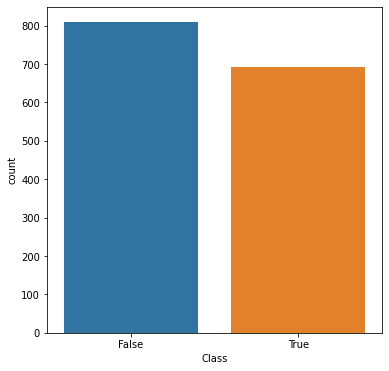

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(df['Class'])
plt.show()
plt.savefig("/content/Class_map.png")

#Categories X and Y value and Train x and Y value

In [19]:
X= df.drop(columns='Class')
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   


# Decision Tree Classifier

In [20]:
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [21]:
clf_model.score(X_train,y_train)

0.7447619047619047

In [22]:
tree_param = {'criterion':['gini','entropy'],'max_depth': [6,8,10],'max_features':[6,8,10],'min_samples_leaf':[2,4,6,8,10],'max_leaf_nodes':[20,30,40], "min_samples_split":[2,4,6,8]}
best_model = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param, verbose=1, cv=5)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10], 'max_features': [6, 8, 10],
                         'max_leaf_nodes': [20, 30, 40],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=1)

In [23]:
best_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 10,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [24]:
best_model.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=10, max_leaf_nodes=30,
                       min_samples_leaf=2, random_state=42)

In [25]:
best_model.fit(X_train,y_train)


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10], 'max_features': [6, 8, 10],
                         'max_leaf_nodes': [20, 30, 40],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=1)

In [26]:
y_predict = best_model.predict(X_train)

In [27]:
Final_result(y_train, y_predict)

Final_Result Metrics:
Accuracy: 0.8914285714285715
Recall: 0.887619367461963
F1 Score: 0.8898929652919079
Precision: 0.8951312812574422


In [28]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

       False       0.87      0.94      0.90       566
        True       0.92      0.84      0.88       484

    accuracy                           0.89      1050
   macro avg       0.90      0.89      0.89      1050
weighted avg       0.89      0.89      0.89      1050



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


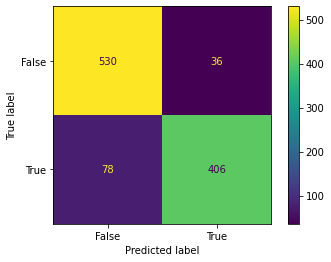

In [66]:
plot_confusion_matrix(best_model, X_train, y_train) 
plt.show()

In [29]:
y_test_predict = best_model.predict(X_test)
Final_result(y_test, y_test_predict)

Final_Result Metrics:
Accuracy: 0.8311111111111111
Recall: 0.8271604938271605
F1 Score: 0.8288254019099481
Precision: 0.8326628797832987


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


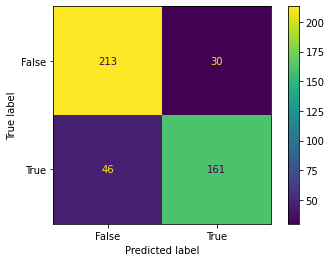

In [30]:
plot_confusion_matrix(best_model, X_test, y_test) 
plt.show()

In [31]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

       False       0.82      0.88      0.85       243
        True       0.84      0.78      0.81       207

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.83      0.83      0.83       450



# Random Forest Classifier

In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
model.score(X_train,y_train)

1.0

In [35]:
grid={"n_estimators":[100,200,300],"max_features":[4,5,6],"max_depth":[6,7,8], "min_samples_split":[5,10,20,30]} 
RF_best_model=GridSearchCV(estimator=model,cv=5,param_grid=grid)
RF_best_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [4, 5, 6],
                         'min_samples_split': [5, 10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [36]:
print(RF_best_model.best_params_)
print(RF_best_model.best_estimator_)

{'max_depth': 8, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 200}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=5,
                       n_estimators=200)


In [37]:
RF_best_model.score(X_train,y_train)

0.98

In [38]:
RF_y_predict = RF_best_model.predict(X_train)

In [39]:
Final_result(y_train, RF_y_predict)

Final_Result Metrics:
Accuracy: 0.98
Recall: 0.9787547819992407
F1 Score: 0.9798278459890347
Precision: 0.9813111721941069


In [40]:
print(classification_report(y_train, RF_y_predict))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       566
        True       0.99      0.96      0.98       484

    accuracy                           0.98      1050
   macro avg       0.98      0.98      0.98      1050
weighted avg       0.98      0.98      0.98      1050



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


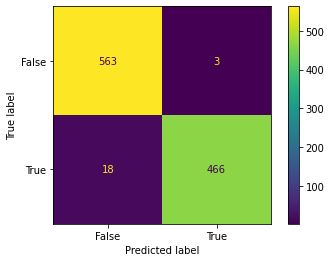

In [67]:
plot_confusion_matrix(RF_best_model, X_train, y_train) 
plt.show()

In [41]:
RF_y_test_predict = RF_best_model.predict(X_test)
Final_result(y_test, RF_y_test_predict)

Final_Result Metrics:
Accuracy: 0.8733333333333333
Recall: 0.8694757559491859
F1 Score: 0.8715515471403319
Precision: 0.8762145748987854


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


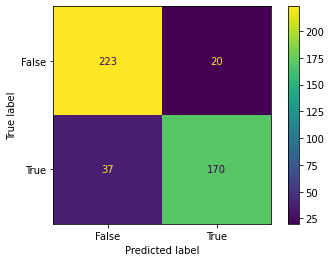

In [42]:
plot_confusion_matrix(RF_best_model, X_test, y_test) 
plt.show()

In [43]:
print(classification_report(y_test, RF_y_test_predict))

              precision    recall  f1-score   support

       False       0.86      0.92      0.89       243
        True       0.89      0.82      0.86       207

    accuracy                           0.87       450
   macro avg       0.88      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



# KNN (K-Nearest Neighbors)

In [44]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
knn_model= KNeighborsClassifier(n_neighbors=5)


In [45]:
knn_model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [46]:
knn_model.score(X_train_scale,y_train)

0.8342857142857143

In [47]:
estimator_KNN =KNeighborsClassifier(algorithm='auto')
Param_KNN ={'n_neighbors':(1,10,1),'leaf_size': (20,40,1),'p': (1,2),'weights': ('uniform', 'distance'),'metric': ('minkowski', 'chebyshev')}
Grid_search_KNN =GridSearchCV(estimator=estimator_KNN,param_grid=Param_KNN,scoring = 'accuracy',n_jobs = -1,cv = 5)

In [48]:
Grid_search_KNN.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [49]:
y_pred_train_knn = Grid_search_KNN.predict(X_train_scale)

In [50]:
Final_result(y_train, y_pred_train_knn)

Final_Result Metrics:
Accuracy: 0.819047619047619
Recall: 0.8104539613935695
F1 Score: 0.8134426057813153
Precision: 0.8325473911411412


In [51]:
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

       False       0.78      0.92      0.85       566
        True       0.88      0.70      0.78       484

    accuracy                           0.82      1050
   macro avg       0.83      0.81      0.81      1050
weighted avg       0.83      0.82      0.82      1050



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


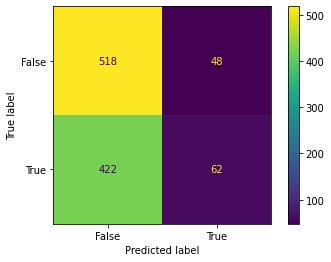

In [68]:
plot_confusion_matrix(Grid_search_KNN, X_train, y_train) 
plt.show()

In [52]:
y_pred_test_knn = Grid_search_KNN.predict(X_test_scale)

In [53]:
Final_result(y_test, y_pred_test_knn)

Final_Result Metrics:
Accuracy: 0.7977777777777778
Recall: 0.7898550724637681
F1 Score: 0.7923122568734753
Precision: 0.8063025210084034


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


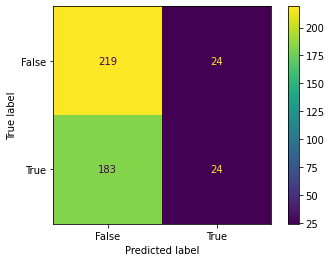

In [54]:
plot_confusion_matrix(Grid_search_KNN, X_test, y_test) 
plt.show()

In [55]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

       False       0.77      0.89      0.83       243
        True       0.84      0.69      0.76       207

    accuracy                           0.80       450
   macro avg       0.81      0.79      0.79       450
weighted avg       0.80      0.80      0.80       450



# Support Vector Machine

In [56]:
clf = svm.SVC(kernel='poly', degree=8)
clf.fit(X_train_scale, y_train)

SVC(degree=8, kernel='poly')

In [57]:
clf.score(X_train_scale,y_train)

0.7714285714285715

In [58]:
y_pred_train_SVM = clf.predict(X_train_scale)
print(classification_report(y_train, y_pred_train_SVM))

              precision    recall  f1-score   support

       False       0.71      0.99      0.82       566
        True       0.98      0.52      0.68       484

    accuracy                           0.77      1050
   macro avg       0.84      0.75      0.75      1050
weighted avg       0.83      0.77      0.76      1050



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


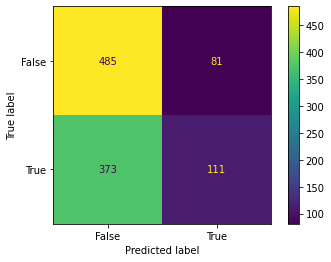

In [69]:
plot_confusion_matrix(clf, X_train, y_train) 
plt.show()

In [59]:
Final_result(y_train, y_pred_train_SVM)

Final_Result Metrics:
Accuracy: 0.7714285714285715
Recall: 0.7529641094530268
F1 Score: 0.7496025437201908
Precision: 0.8409260862720402


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


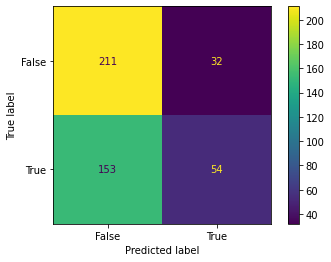

In [60]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

In [61]:
y_pred_test_SVM = clf.predict(X_test_scale)
print(classification_report(y_test, y_pred_test_SVM))

              precision    recall  f1-score   support

       False       0.65      0.94      0.77       243
        True       0.85      0.40      0.54       207

    accuracy                           0.69       450
   macro avg       0.75      0.67      0.66       450
weighted avg       0.74      0.69      0.66       450



In [62]:
Final_result(y_test, y_pred_test_SVM)

Final_Result Metrics:
Accuracy: 0.6911111111111111
Recall: 0.6696188942565754
F1 Score: 0.6553244248519079
Precision: 0.7473330241187384


# Test Data

In [63]:
df_test.fillna(df.mean(),inplace=True)
X_test_Feature= df_test.drop(columns='Class')
#Grid_search_KNN 
y_test_predict = Grid_search_KNN.predict(X_test_Feature)
df_test['Class']=y_test_predict
df_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,10.853013,True
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,10.853013,False
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.270000,False
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.730000,False
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.310000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,27.7,20.40,-0.82,5.50,8.25,392.58,-2.05,5,6.63,124.56,4.58,19.50,10,5.88,10.853013,False
1496,17.7,32.70,7.16,3.04,11.04,92.58,-1.71,170,3.74,414.56,1.02,16.50,10,9.33,10.853013,False
1497,15.7,0.45,-2.90,16.96,21.33,128.58,1.84,58,9.74,112.56,-2.84,2.07,1,2.18,11.820000,False
1498,7.7,1.74,1.60,11.24,21.39,119.58,-0.32,18,7.41,90.56,-3.10,2.67,1,1.88,10.853013,False


In [70]:
from google.colab import files
df_test.to_csv('CE802_P2_Test.csv') 
files.download('CE802_P2_Test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>